In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

 here I devidede the data into trainning and testing data 

In [3]:
df = pd.read_csv("/home/melissa/Desktop/win/PROGDY_SD_02/titanic (1)/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First we check about null or missing values 

df.isna()

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(columns="Cabin",axis=1,inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Filling the missing values of the age column by Mean value of the column because 177 is quite a lot of missing values 

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Filling the missing values of the Embarked column by Mode value of the column because there is few missing values 

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
df.isnull().sum().sum()

0

Now we are done with data cleanning 

In [36]:

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

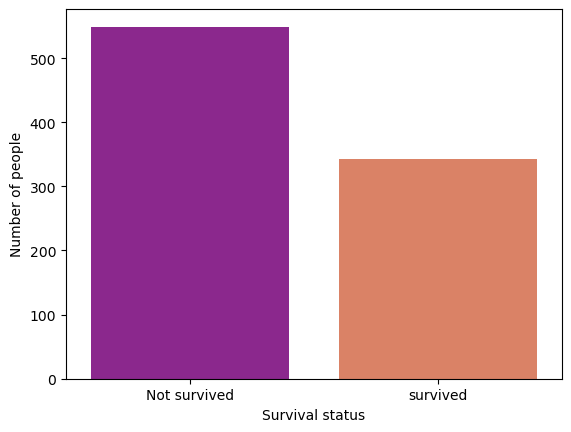

In [37]:
sns.countplot(x='Survived',data=df,palette='plasma',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()


After visualizing the survivals, we try to visualize the number of survivals from each gender

In [38]:
df['Sex'].unique()

array([1, 0])

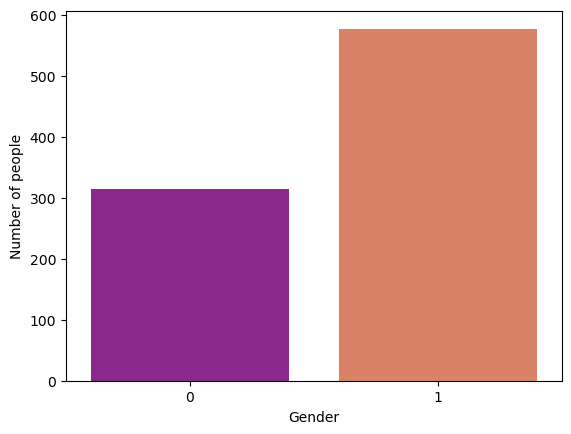

In [39]:
sns.countplot(x='Sex',data=df,palette='plasma',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

From this plot, we notice that the number of males is higher than the number of female, let's visualize the number of survivals from each gender 

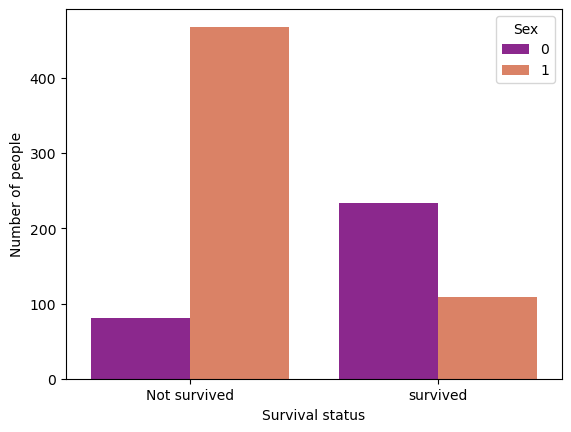

In [40]:

sns.countplot(x='Survived',hue='Sex',data=df,palette='plasma',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Hmm, We notice that the number of males that survived is less than the number of males that died in this tragedy, whereas it is the opposite for females, why that ? Before answering this we will test another factor, for instance passenger class

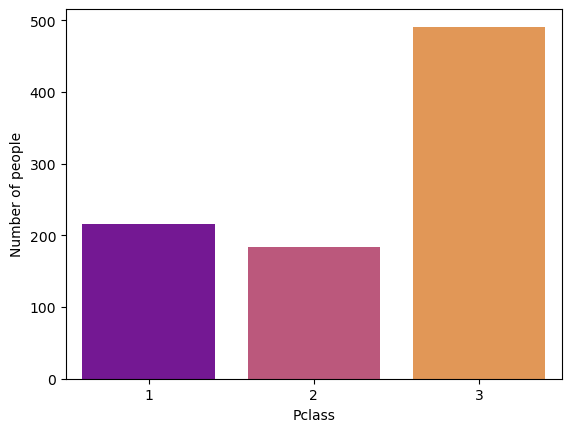

In [19]:
sns.countplot(x='Pclass',data=df,palette='plasma',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

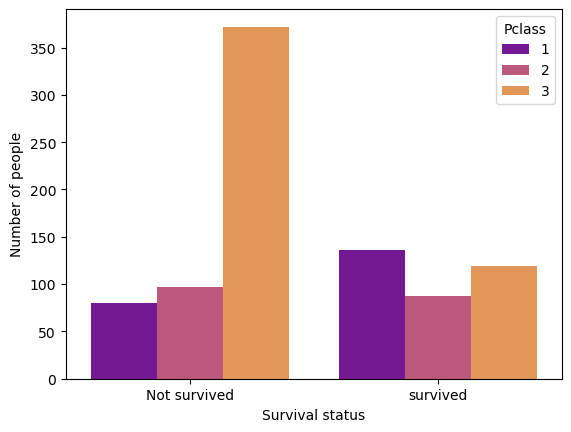

In [20]:

sns.countplot(x='Survived',hue='Pclass',data=df,palette='plasma',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Respectively people from class 1, 2, 3 have more survivals, we can make many assumptions why mostly people from class 3 were the victims

what about the Age ?  

/tmp/ipykernel_28538/2093641993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(df['Age'].dropna(),kde=False,bins=30))


Axes(0.125,0.11;0.775x0.77)


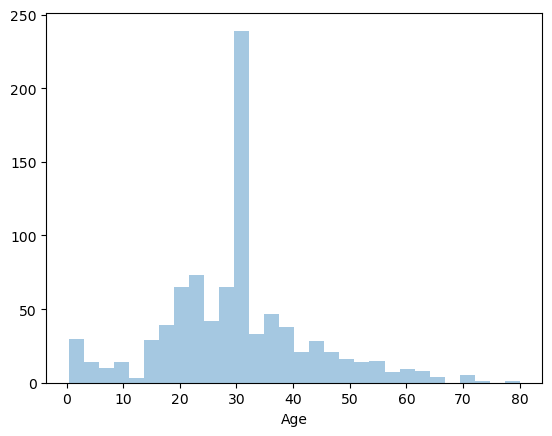

In [24]:
print(sns.distplot(df['Age'].dropna(),kde=False,bins=30))

The boxplot below shows that the survival rate is lesser for people in that age bracket.

I tried to predict the data on the Age factor. Looking at the 'Age' Distribution, we clearly see that majority of the people in the ship were between the Age of 20 and 30.


Axes(0.125,0.11;0.775x0.77)


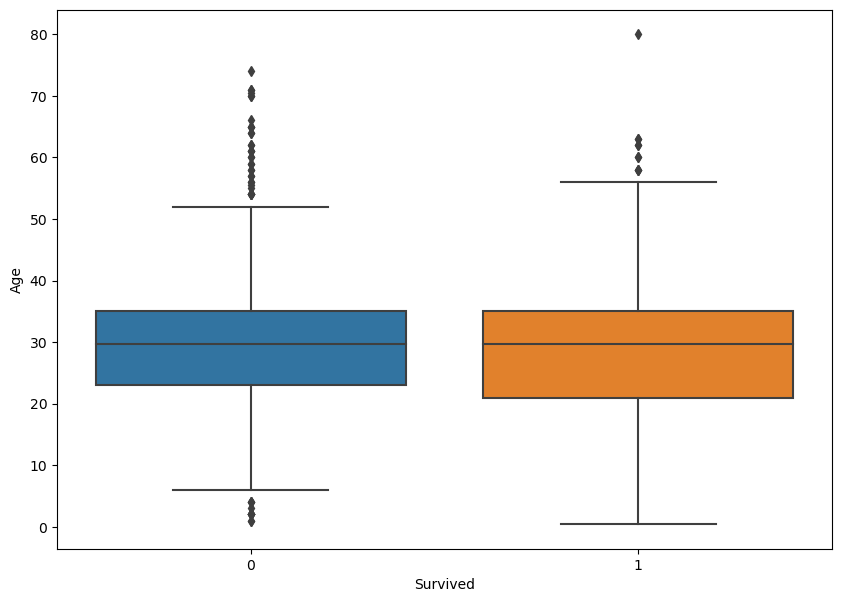

In [27]:
plt.figure(figsize=(10,7))
print(sns.boxplot(x='Survived',y='Age',data=df))

Further, most people in Class 2 and Class 3 who did not survive, belong to the age Bracket 20 - 30. This indicates that majority of the survivors were from Class 1. The richer and older the passengers, the more likely he/she was to survive. Probably because of the preferences or priority given to upper class passengers in the evacuation operation. 

Visualization of people survived from different Embarkment

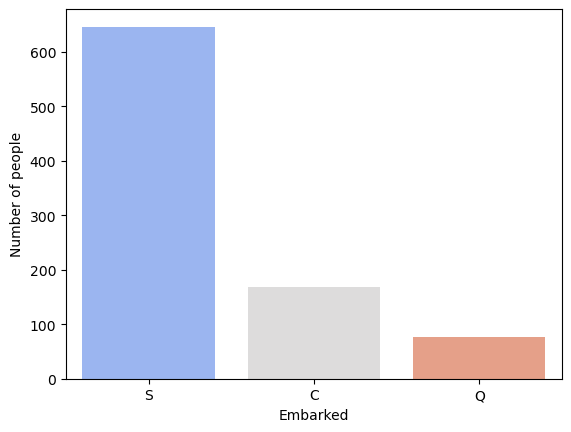

In [28]:
sns.countplot(x='Embarked',data=df,palette='coolwarm',)
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()

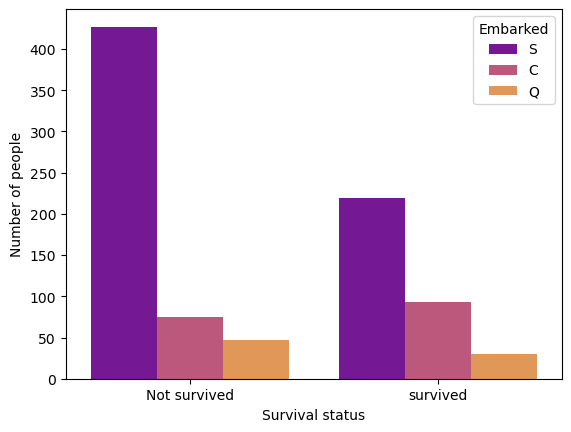

In [29]:
sns.countplot(x='Survived',hue='Embarked',data=df,palette='plasma',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

I tried to study the factors : SibSp - Number of siblings or spouse and Parch - Parent or child 

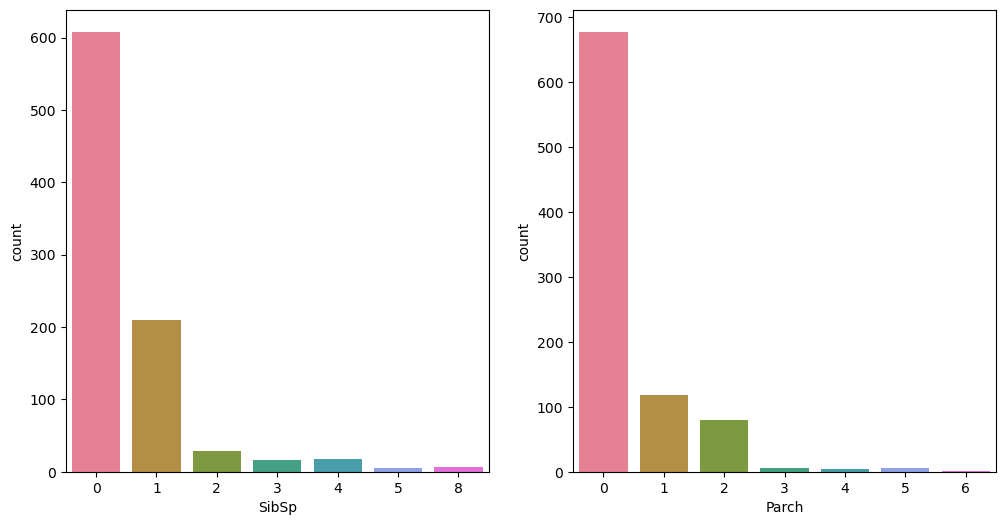

In [30]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')
plt.show()

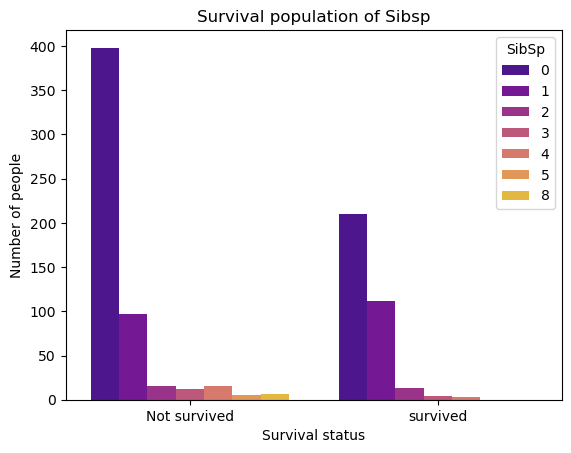

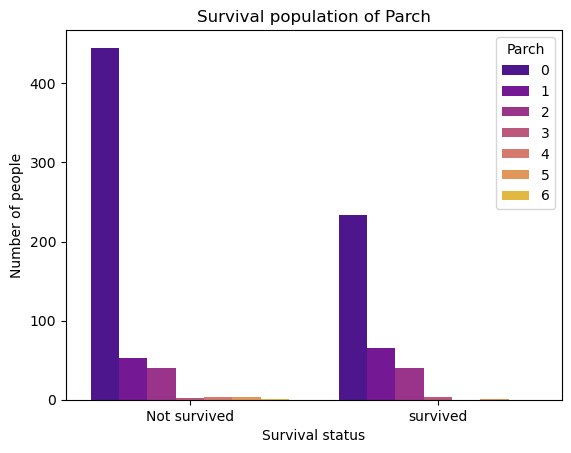

In [31]:
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='plasma')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df,palette='plasma')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

In [ ]:
the more children you have the more you are likely to die...Bam

In [ ]:
checking for correlation

In [32]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [34]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

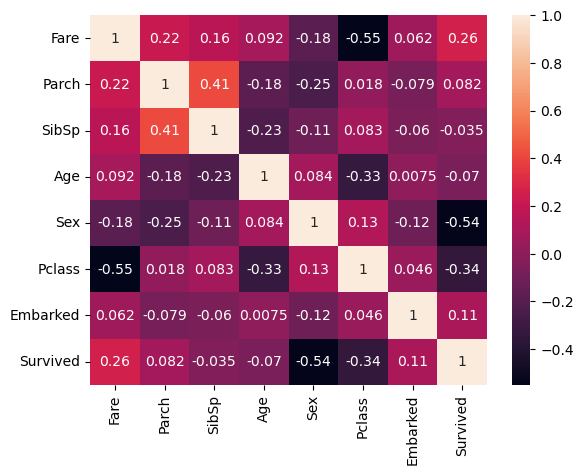

In [35]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

#### Observation:

Fare, sex, Pclass, Embarked has correlation with survived column

# Conclusion :

1-Gender Disparity: The survival rate among females was significantly higher compared to males. This observation aligns with the "women and children first" protocol followed during the Titanic disaster, reflecting societal norms of the time prioritizing women's and children's safety.

2-Passenger Class Disparity: Although the population of passengers in Class 3 was the highest, they had the lowest survival rate. This indicates a potential correlation between socio-economic status and survival, with passengers in higher classes likely having better access to lifeboats and other resources during the evacuation.

3-Gender and Passenger Class Interaction: Further analysis reveals that males from Class 3 had the lowest survival rate. This suggests a compounded effect of gender and socio-economic status, where male passengers in the lower classes faced the highest risk of not surviving the disaster.

4-Age Factor: Young adults had the least survival rate, indicating that age played a role in survival outcomes. This could be attributed to the "women and children first" policy, where younger individuals were given priority during the evacuation.

5-Correlation with Survived Column: The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations with the survival outcome. This reinforces the importance of these factors in determining survival chances during the Titanic disaster.